# Experiment 1: VUS vs FF-VUS vs AUC

## Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
# import re
# import random

from tqdm import tqdm
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [2]:
results_file = os.path.join('experiments', 'vus_ffvus_auc_synthetic', 'results')

project_root_path = os.path.join('..', '..')
experiment_path = os.path.join(project_root_path, 'experiments', 'vus_ffvus_auc_synthetic')
results_path = os.path.join(experiment_path, 'results')

In [3]:
def load_results(csv_file):
    return pd.read_csv(csv_file, index_col=0)

result_files = [file for file in os.listdir(results_path) if file.endswith('.csv')]
print(f'Number of result files: {len(result_files)}')

Number of result files: 1532


In [5]:
def extract_info(file_name):
    file_name_norm = file_name.replace('.csv', '')
    parts = file_name_norm.split('_')

    info = {
        'length': int(parts[2]),
        'n_anomalies': int(parts[5]),
        'avg_anomaly_length': int(parts[9]),
        'metric': parts[10],
    }

    if 'VUS' in info['metric']:
        info.update({
            'slope_size': int(parts[11]),
        })

    if 'FF' in info['metric']:
        info.update({
            'step': int(parts[12]),
            'confusion_matrix': f"{parts[13]}_{parts[14]}",
            'slope': parts[15],
            'existence': parts[16]
        })
    return info

# Extract information from all files
# result_files_metadata = [extract_info(file) for file in result_files]

# Convert to DataFrame
# result_files_metadata = pd.DataFrame(result_files_metadata)

In [6]:
# Initialize an empty DataFrame to store the combined data
df = pd.DataFrame()

# Read and combine all files
for file in tqdm(result_files):
    file_path = os.path.join(results_path, file)
    curr_df = pd.read_csv(file_path, index_col=0)
    df = pd.concat([df, curr_df], ignore_index=True)

df

100%|██████████████████████████████████████| 1532/1532 [00:03<00:00, 453.36it/s]


,Time series,Length,Number of anomalies,Anomalies average length,Metric,Metric value,Metric time,Slope size,Step,Slopes,...,Thresholds time,Score mask time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Total time,Anomalies coordinates time,Position time
0,syn_10000_5_100_1.npy,10000,5,111.40,VUS-PR,0.964476,0.120723,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,syn_10000_5_100_2.npy,10000,5,112.20,VUS-PR,0.705832,0.121906,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,syn_10000_5_100_4.npy,10000,5,96.40,VUS-PR,0.901306,0.116774,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,syn_10000_5_100_7.npy,10000,5,91.80,VUS-PR,0.891551,0.111724,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,syn_10000_5_100_8.npy,10000,4,94.25,VUS-PR,0.773706,0.077570,16.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15297,syn_10000000_5_10000_1.npy,10000000,5,9640.60,VUS-PR,0.707011,57.028466,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15298,syn_10000000_5_10000_7.npy,10000000,5,10689.80,VUS-PR,0.982136,53.903297,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15299,syn_10000000_5_10000_8.npy,10000000,5,10178.60,VUS-PR,0.981879,53.294859,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15300,syn_10000000_5_10000_9.npy,10000000,5,10176.00,VUS-PR,0.801774,57.437384,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Analysis

In [7]:
df.tail(3)

,Time series,Length,Number of anomalies,Anomalies average length,Metric,Metric value,Metric time,Slope size,Step,Slopes,...,Thresholds time,Score mask time,Slopes time,Existence time,Confusion matrix time,Precision recall curve time,Integral time,Total time,Anomalies coordinates time,Position time
15299,syn_10000000_5_10000_8.npy,10000000,5,10178.6,VUS-PR,0.981879,53.294859,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15300,syn_10000000_5_10000_9.npy,10000000,5,10176.0,VUS-PR,0.801774,57.437384,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15301,syn_10000000_5_10000_3.npy,10000000,5,10211.8,VUS-PR,0.585709,58.099334,32.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


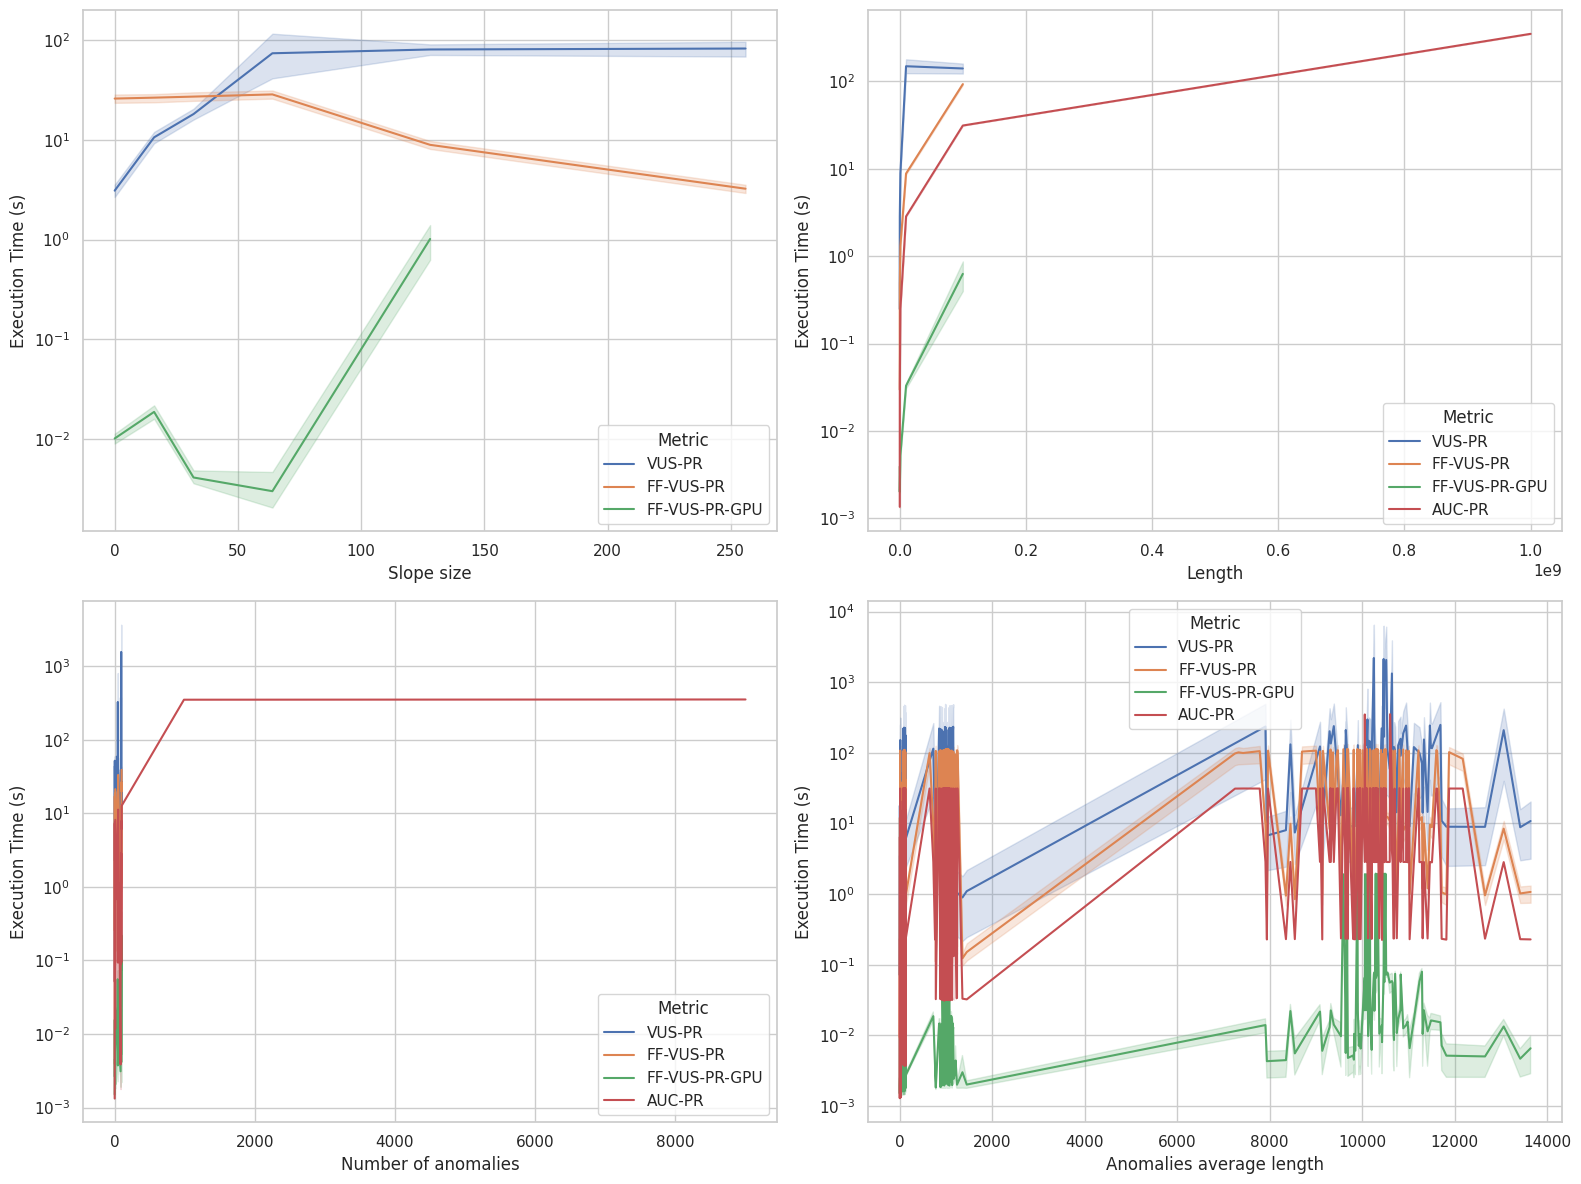

In [21]:
# Separate the data
auc_df = df[df['Metric'] == 'AUC-PR']
vus_df = df[df['Metric'] != 'AUC-PR']

# Set the style
sns.set(style="whitegrid")
fig, ax = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Metric time vs Slope size
sns.lineplot(ax=ax[0, 0], data=vus_df, x='Slope size', y='Metric time', hue='Metric')
auc_time = auc_df['Metric time'].mean()
axs[0, 0].axhline(auc_time, color='black', linestyle='--', label='AUC-PR')
axs[0, 0].legend()
axs[0, 0].set_title('Execution Time vs Slope Size')

# Plot 2: Metric time vs Length
sns.lineplot(ax=ax[0, 1], data=df, x='Length', y='Metric time', hue='Metric')
axs[0, 1].legend()
axs[0, 1].set_title('Execution Time vs Time Series Length')

# Plot 3: Metric time vs Number of anomalies
sns.lineplot(ax=ax[1, 0], data=df, x='Number of anomalies', y='Metric time', hue='Metric')
axs[1, 0].legend()
axs[1, 0].set_title('Execution Time vs Number of Anomalies')

# Plot 4: Metric time vs Anomalies average length
sns.lineplot(ax=ax[1, 1], data=df, x='Anomalies average length', y='Metric time', hue='Metric')
axs[1, 1].legend()
axs[1, 1].set_title('Execution Time vs Anomalies Avg Length')

# Improve layout
for axis in ax.flat:
    axis.set_xlabel(axis.get_xlabel(), fontsize=12)
    axis.set_ylabel("Execution Time (s)", fontsize=12)
    axis.grid(True)
    axis.set_yscale('log')

plt.tight_layout()
plt.show()

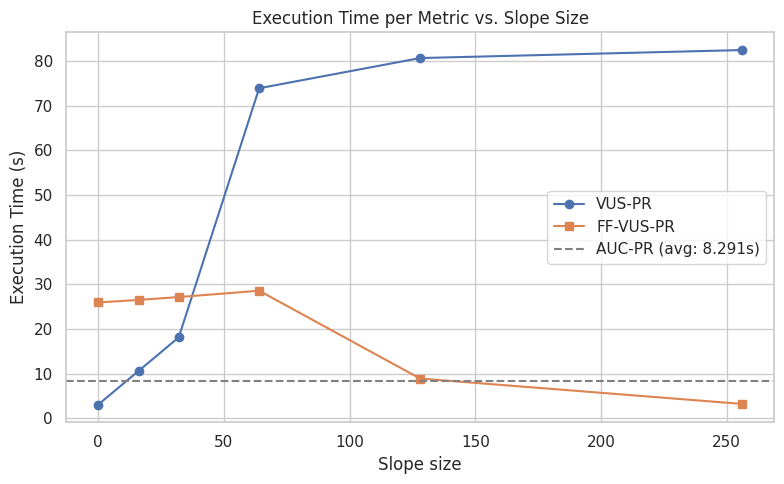

In [23]:
# Filter only relevant metrics
df_filtered = df[df["Metric"].isin(["VUS-PR", "FF-VUS-PR", "AUC-PR"])]

# Create slope-size-based curves for VUS-PR and FF-VUS-PR
vus = df_filtered[df_filtered["Metric"] == "VUS-PR"].groupby("Slope size")["Metric time"].mean()
ff_vus = df_filtered[df_filtered["Metric"] == "FF-VUS-PR"].groupby("Slope size")["Metric time"].mean()

# Get constant AUC-PR time
auc_pr_times = df_filtered[df_filtered["Metric"] == "AUC-PR"]["Metric time"]
auc_pr_mean = auc_pr_times.mean()

# Plot
plt.figure(figsize=(8, 5))
plt.plot(vus.index, vus.values, marker="o", label="VUS-PR")
plt.plot(ff_vus.index, ff_vus.values, marker="s", label="FF-VUS-PR")
plt.axhline(y=auc_pr_mean, color="gray", linestyle="--", label=f"AUC-PR (avg: {auc_pr_mean:.3f}s)")

plt.xlabel("Slope size")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time per Metric vs. Slope Size")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
